In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
#%pip install --upgrade psutil
#%pip install dython
from dython import nominal
import dataframe_image as dfi


In [2]:
os.getcwd()

'/Users/jamesevans/Documents/GitHub/Data-Dive-1'

In [3]:
df = pd.read_csv('survey lung cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.head()

0      1
1      2
2      1
3      1
4      1
      ..
304    1
305    2
306    2
307    2
308    2
Name: ALLERGY , Length: 309, dtype: int64

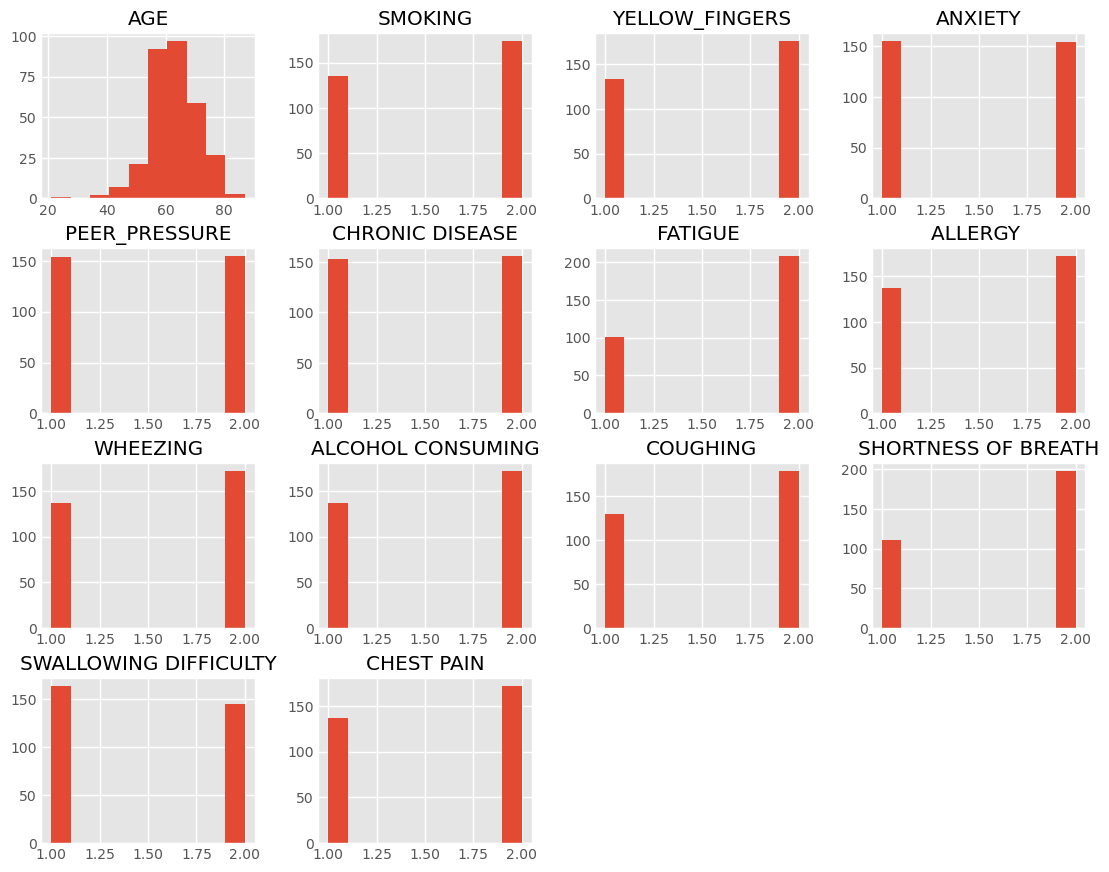

In [6]:
df.hist(figsize=(12,10))
plt.show()

/var/folders/8y/_5xbmnyx63n5_0zd2ycbxld00000gn/T/ipykernel_56799/612469519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


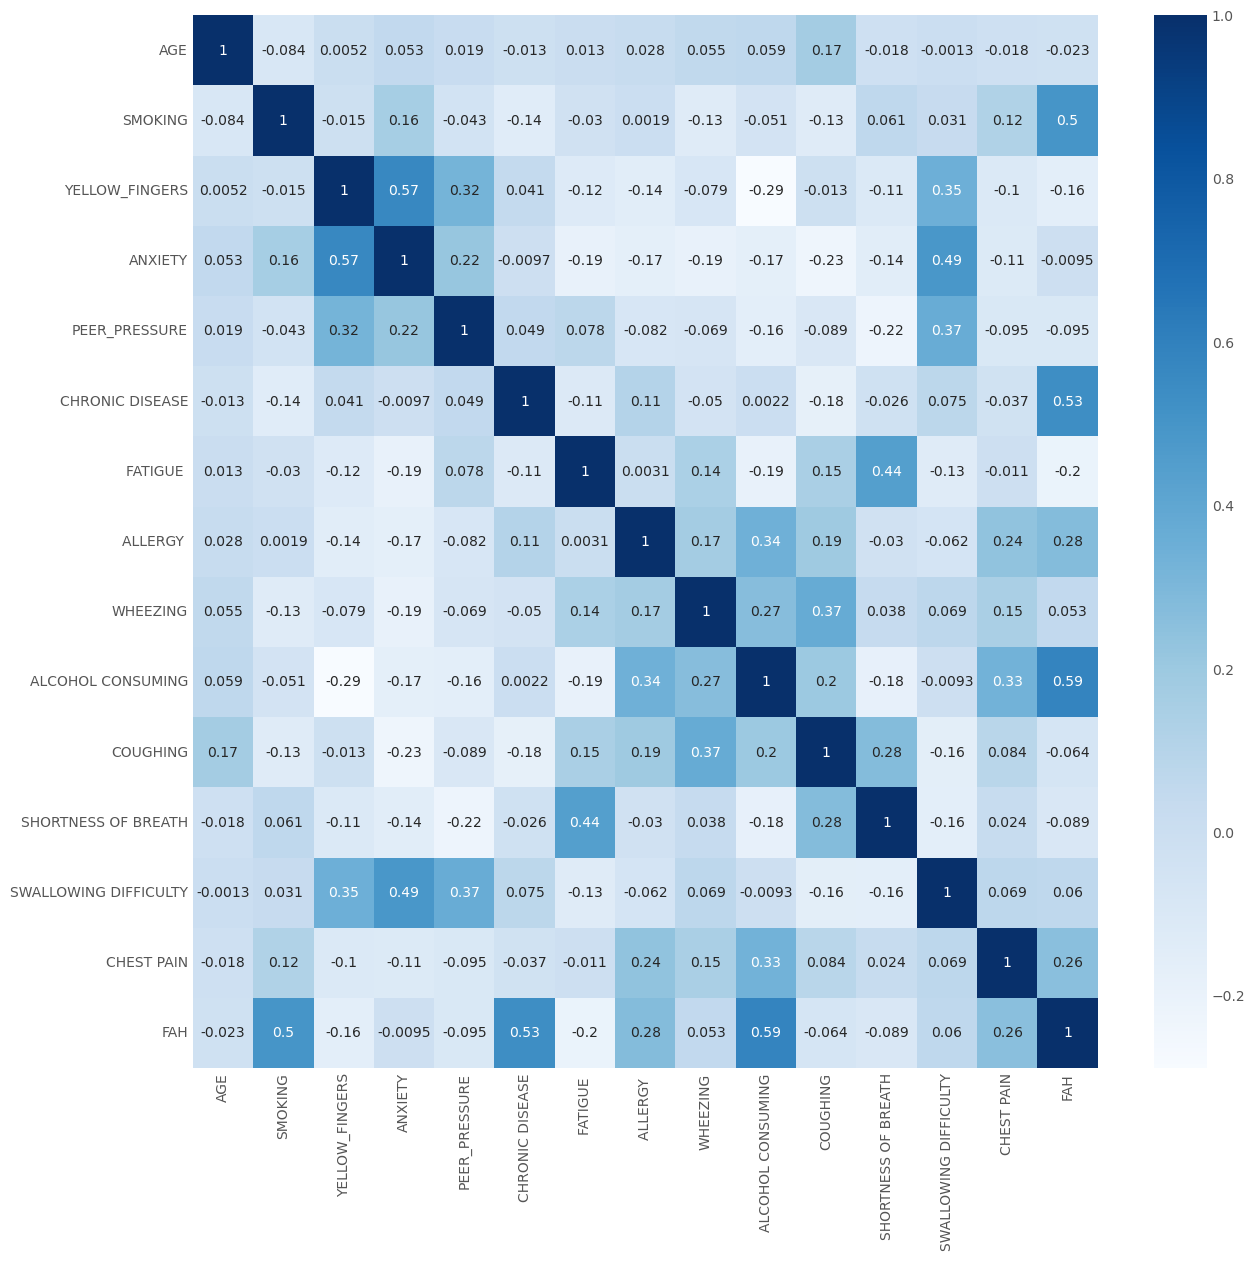

In [61]:
#creating a single correlation matrix for each indivdual variable
corr = df.corr()
features = corr.index
plt.figure(figsize=(13,13))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='Blues')

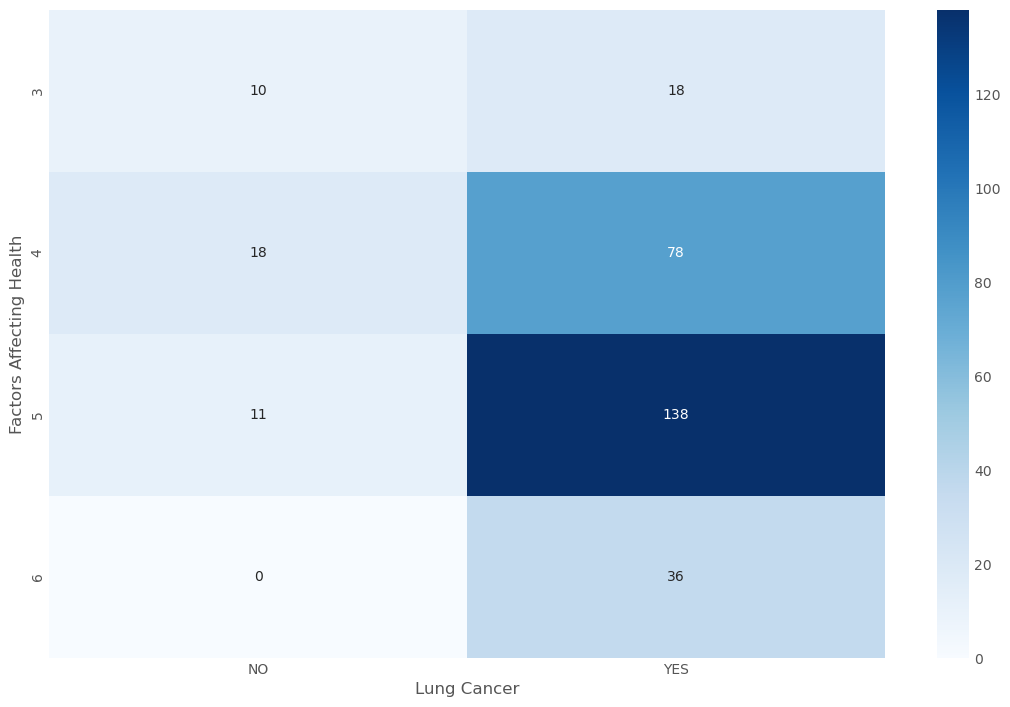

In [62]:
#Create new variable that encompasses the three variables that affect overall health of patient
df['FAH'] = df['ALCOHOL CONSUMING'] + df['CHRONIC DISEASE'] + df['SMOKING']

pd.crosstab(df['SMOKING'], df['LUNG_CANCER'])
contigency = pd.crosstab(df['FAH'], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Factors Affecting Health')
plt.xlabel('Lung Cancer');


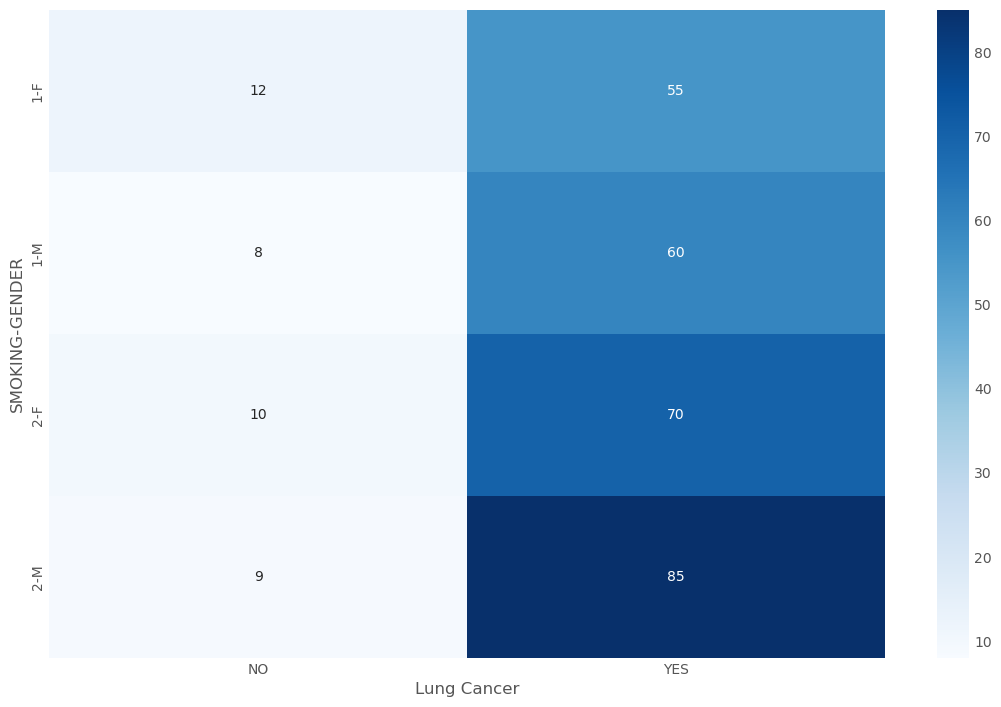

In [9]:
#Standard contigency table for now how to read them
STANDARD = pd.crosstab([df['SMOKING'],df['GENDER']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(STANDARD, annot=True, cmap="Blues",fmt = '.0f')
plt.xlabel('Lung Cancer');

##WILL NOT BE USED

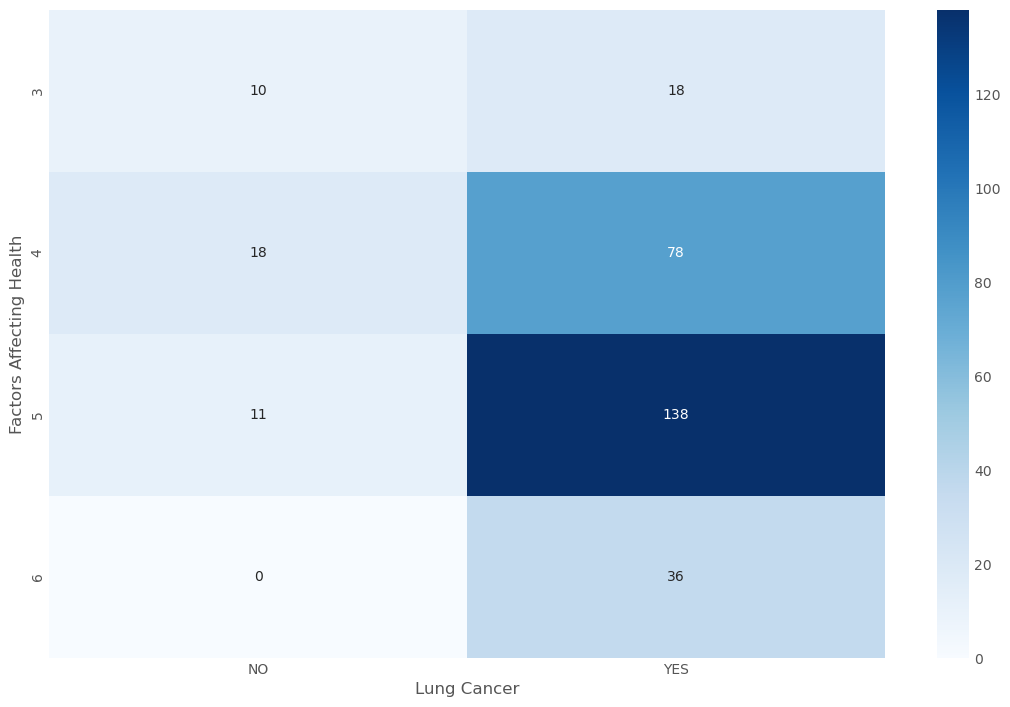

In [10]:
#Contigency table for newly added variable FAH
contigency = pd.crosstab([df['FAH']], df['LUNG_CANCER'])

#Heat map
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Factors Affecting Health')
plt.xlabel('Lung Cancer');

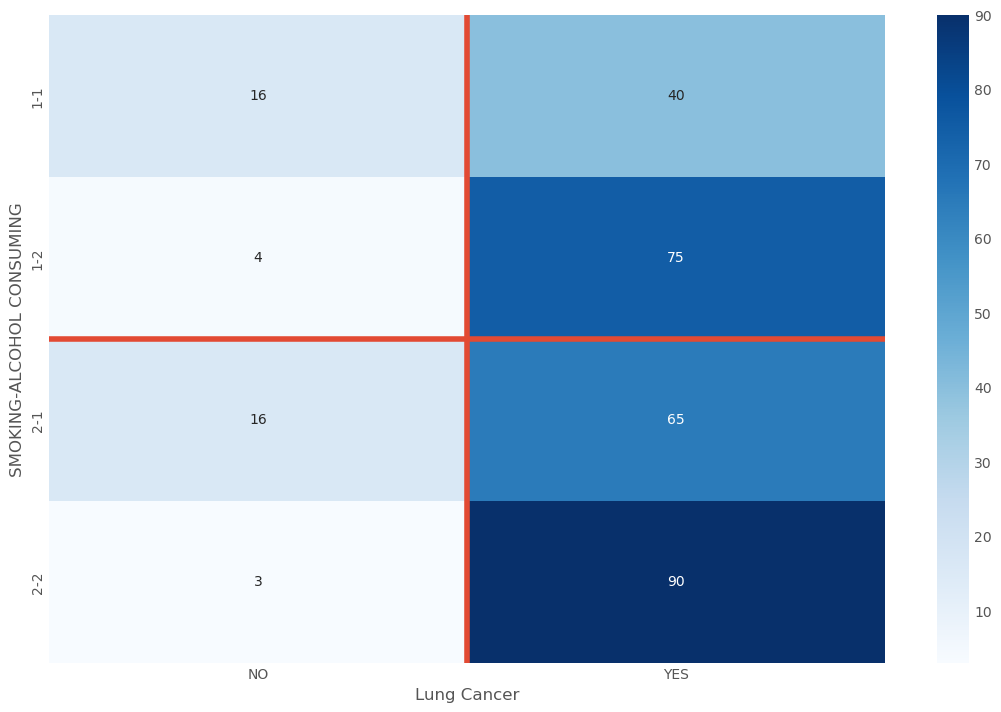

In [45]:
cont = pd.crosstab([df['SMOKING'],df['ALCOHOL CONSUMING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

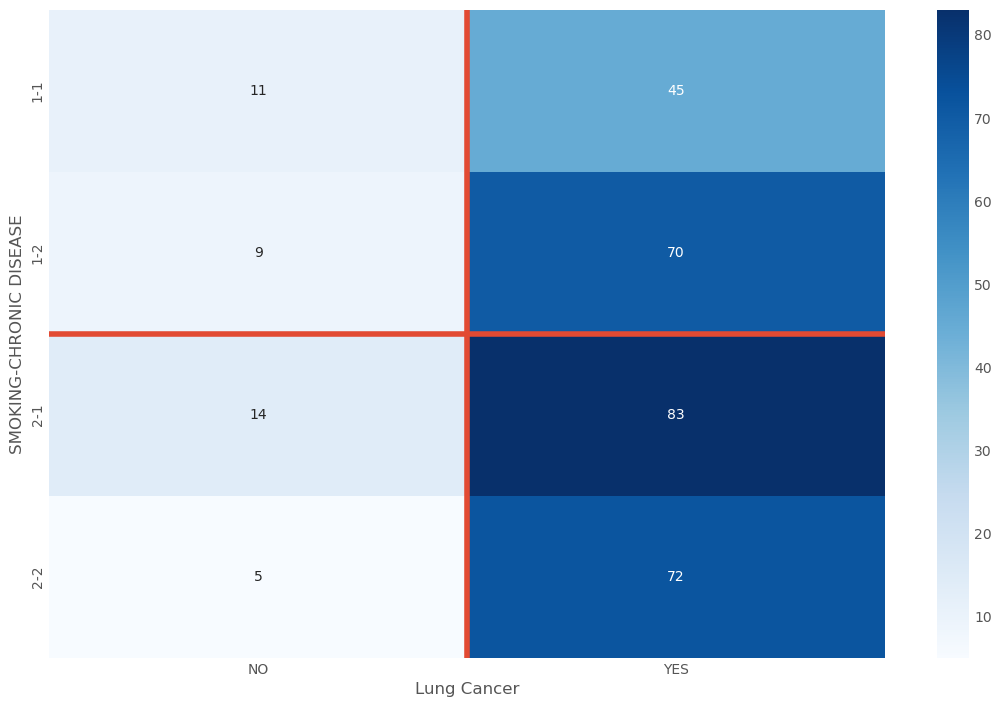

In [54]:
#Contigency table for smoking and chronic disease
SMOKE_CD = pd.crosstab([df['SMOKING'],df['CHRONIC DISEASE']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(SMOKE_CD, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

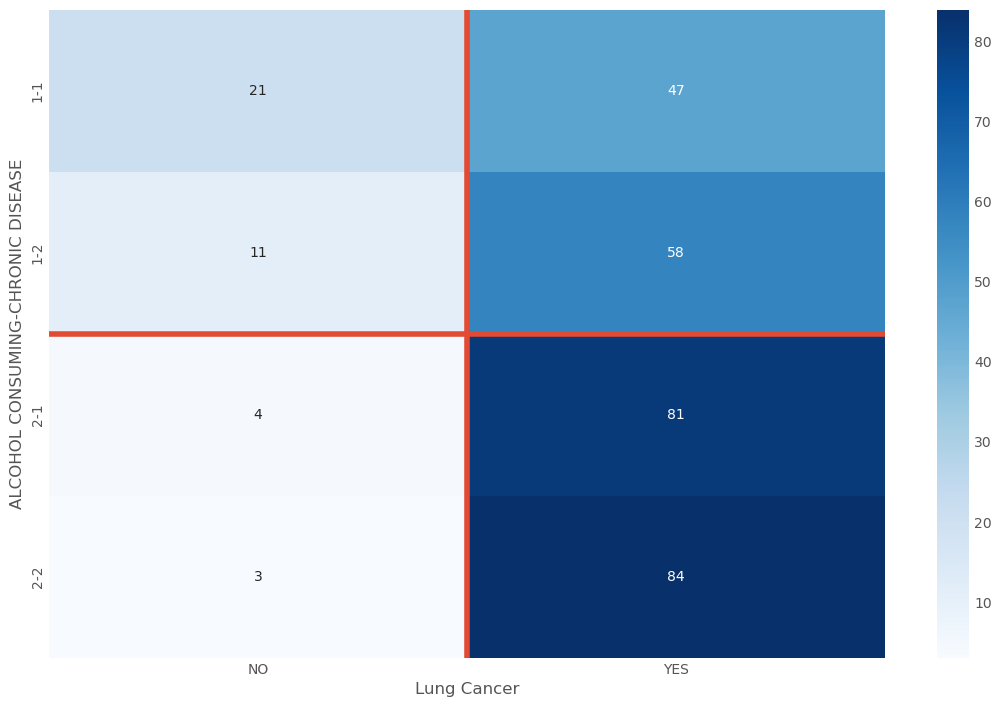

In [55]:
#Contigency table for alcohol and chronic disease
ALCOHOL_CD = pd.crosstab([df['ALCOHOL CONSUMING'],df['CHRONIC DISEASE']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALCOHOL_CD, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');


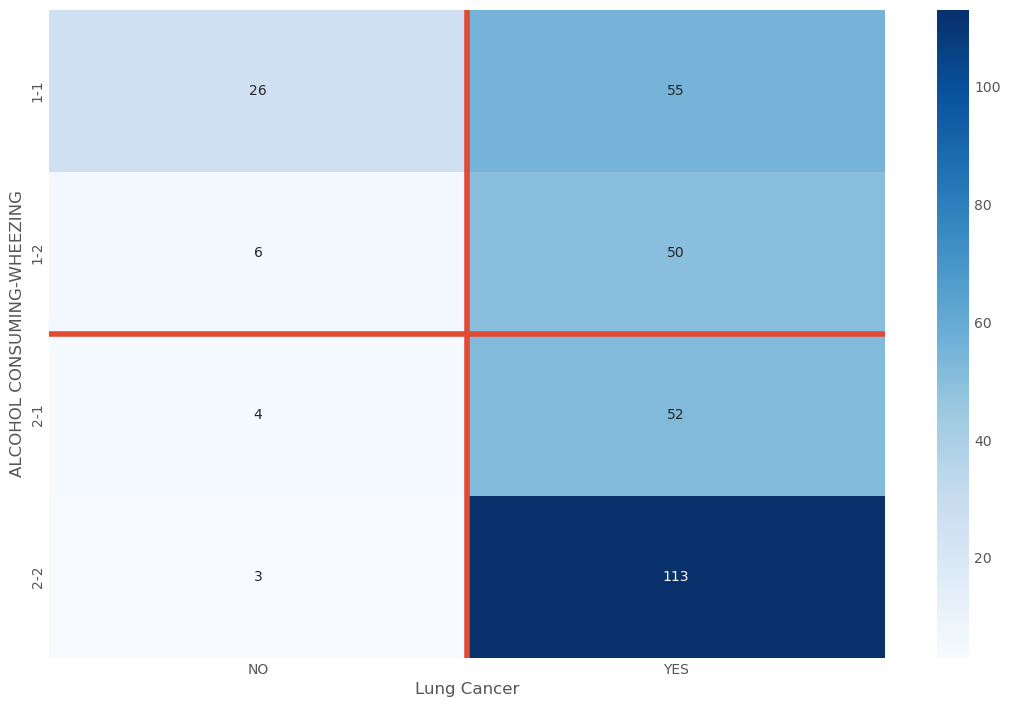

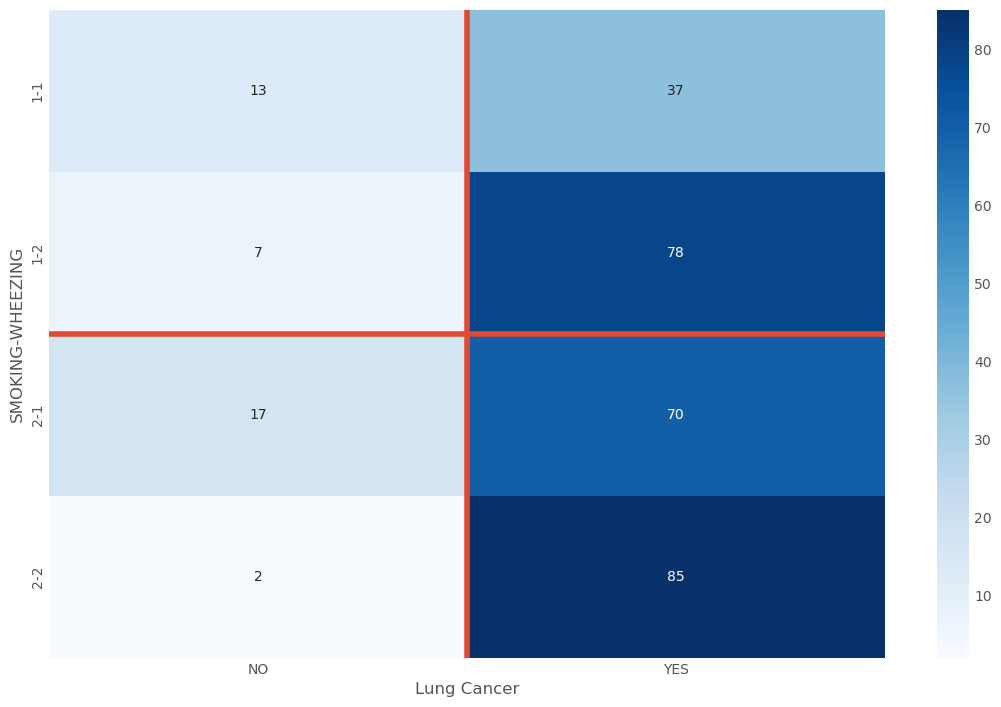

In [57]:
#Contigency table for alcohol and chronic disease
ALCOHOL_WHE = pd.crosstab([df['ALCOHOL CONSUMING'],df['WHEEZING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALCOHOL_WHE, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

SMOK_WHE = pd.crosstab([df['SMOKING'],df['WHEEZING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(SMOK_WHE, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

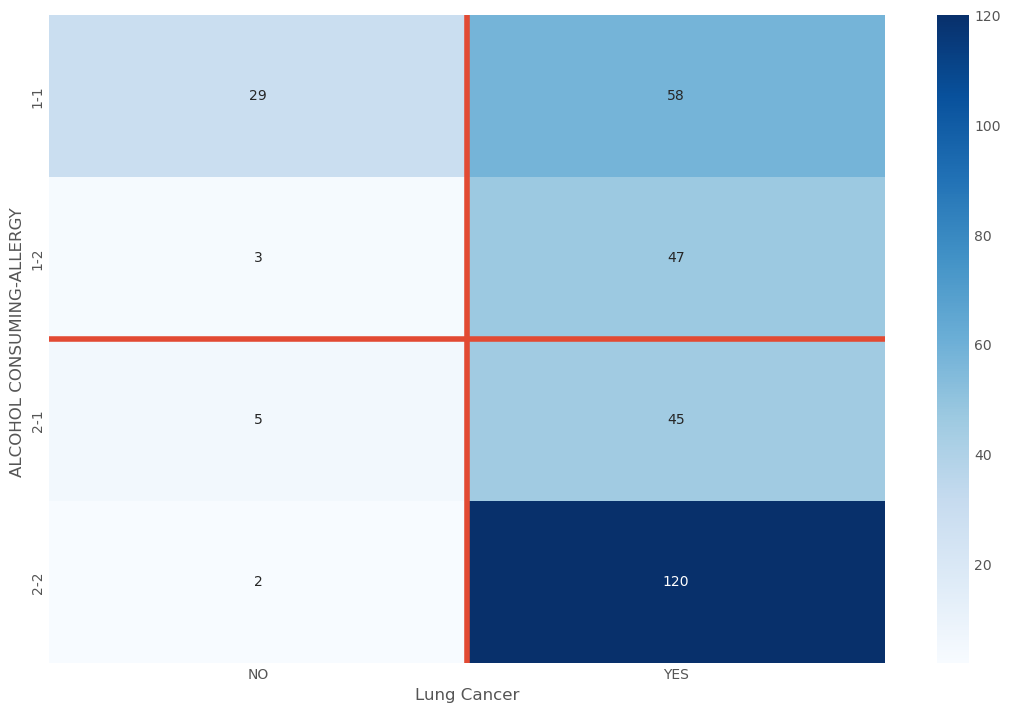

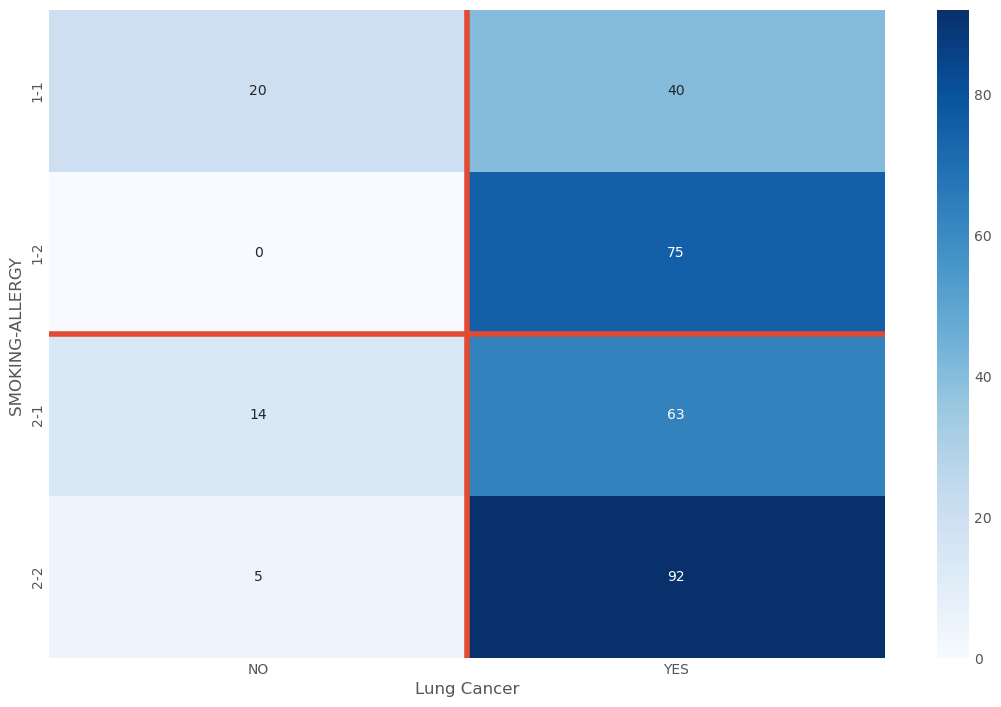

In [7]:
ALC_ALL = pd.crosstab([df['ALCOHOL CONSUMING'],df['ALLERGY ']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALC_ALL, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

SMOK_ALL = pd.crosstab([df['SMOKING'],df['ALLERGY ']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(SMOK_ALL, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

In [70]:
df['ALLERGY']

KeyError: 'ALLERGY'

In [39]:
#AGE does not change to much between just having lung cancer or not
df['AGE'].groupby(df['LUNG_CANCER']).agg('mean')

# 
df['AGE'].groupby([df['LUNG_CANCER'],df['SMOKING'],df['CHRONIC DISEASE'],df['ALCOHOL CONSUMING']]).agg('median')



LUNG_CANCER  SMOKING  CHRONIC DISEASE  ALCOHOL CONSUMING
NO           1        1                1                    59.0
                                       2                    55.0
                      2                1                    62.5
                                       2                    61.0
             2        1                1                    60.0
                                       2                    64.0
                      2                1                    59.0
YES          1        1                1                    62.0
                                       2                    63.0
                      2                1                    66.5
                                       2                    63.5
             2        1                1                    65.0
                                       2                    62.0
                      2                1                    62.0
                                 

In [33]:
df['ALCOHOL CONSUMING'][df['FAH']==5].value_counts()

df['SMOKING'][df['FAH']==5].value_counts()
columns=['Smoking','Alcohol Consuming','Chronic Disease','Counts']
fah_data = pd.DataFrame(df[['SMOKING','ALCOHOL CONSUMING','CHRONIC DISEASE']][df['FAH']==5].value_counts())
dfi.export(fah_data,'fah_dat.png')

In [40]:
fah_data = df[['SMOKING','ALCOHOL CONSUMING','CHRONIC DISEASE']][df['FAH']==5].value_counts()
fah_df = pd.DataFrame(fah_data,columns=['Smoking','Alcohol Consuming','Chronic Disease','Counts'])

ValueError: Shape of passed values is (3, 1), indices imply (3, 4)

In [42]:
import scipy.stats as stats

In [56]:
stats.chi2_contingency(contigency)
stats.chi2_contingency(cont)
print(stats.chi2_contingency(ALCOHOL_CD))
print(stats.chi2_contingency(SMOKE_CD))

print(stats.chi2_contingency(ALCOHOL_WHE))
print(stats.chi2_contingency(SMOK_WHE))

Chi2ContingencyResult(statistic=32.71807238788851, pvalue=3.693239654106863e-07, dof=3, expected_freq=array([[ 8.58252427, 59.41747573],
       [ 8.70873786, 60.29126214],
       [10.72815534, 74.27184466],
       [10.98058252, 76.01941748]]))
Chi2ContingencyResult(statistic=5.5220708744834415, pvalue=0.13732447809234177, dof=3, expected_freq=array([[ 7.06796117, 48.93203883],
       [ 9.97087379, 69.02912621],
       [12.24271845, 84.75728155],
       [ 9.7184466 , 67.2815534 ]]))
Chi2ContingencyResult(statistic=40.16464529628642, pvalue=9.832305094524258e-09, dof=3, expected_freq=array([[ 10.22330097,  70.77669903],
       [  7.06796117,  48.93203883],
       [  7.06796117,  48.93203883],
       [ 14.6407767 , 101.3592233 ]]))
Chi2ContingencyResult(statistic=21.77979264113544, pvalue=7.2487702332178e-05, dof=3, expected_freq=array([[ 6.31067961, 43.68932039],
       [10.72815534, 74.27184466],
       [10.98058252, 76.01941748],
       [10.98058252, 76.01941748]]))


In [ ]:
# Group by age



In [ ]:
# Look at symptoms (coughing, shortness of breath) by alcohol and smoking - Vice Penalty


